In [5]:
"""
Lab Work #3

Прогноз качества вин. Линейная регрессия. 
http://archive.ics.uci.edu/ml/datasets/Wine%2BQuality

kNN, LinearRegression
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from os import getcwd
from sklearn.linear_model import LinearRegression

In [6]:
trainData = pd.read_csv(getcwd() + "\\LWs\\LW_3\\data\\train.csv", sep=";")
testData = pd.read_csv(getcwd() + "\\LWs\\LW_3\\data\\test.csv", sep=";")

In [7]:
trainData.head()

,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11,#12
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
trainData.describe()

,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11,#12
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.957491,0.275835,0.341023,6.364345,0.045627,35.579290,140.498874,0.994188,3.192059,0.488992,10.461206,5.879690
std,0.844744,0.100206,0.122533,5.092889,0.021965,16.913046,43.272642,0.002993,0.152881,0.114198,1.215867,0.910167
min,4.200000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.210000,0.270000,1.700000,0.036000,24.000000,109.000000,0.991880,3.090000,0.410000,9.400000,5.000000
50%,6.900000,0.260000,0.320000,5.175000,0.043000,34.000000,137.000000,0.993900,3.180000,0.470000,10.300000,6.000000
75%,7.400000,0.320000,0.400000,9.800000,0.050000,46.000000,170.000000,0.996272,3.290000,0.550000,11.300000,6.000000
max,14.200000,1.005000,1.660000,65.800000,0.346000,146.500000,366.500000,1.038980,3.820000,1.060000,14.200000,9.000000


In [9]:
trainX = np.array(trainData.drop(['#12'], 1))
trainY = np.array(trainData['#12'])
testX = np.array(testData.drop(['#12'], 1))
testY = np.array(testData['#12'])

In [10]:
lrModel = LinearRegression()

In [11]:
% time
lrModel.fit(trainX, trainY)

Wall time: 0 ns


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
predict = lrModel.predict(testX)
print(predict)

[6.06305946 6.06305946 6.06305946 5.23785952 5.64605076 6.43157705
 6.41833348 6.43157705 6.8485456  5.23785952 5.64605076 6.15296411
 6.30213601 6.78159346 6.06305946 5.60897224 5.61105744 5.23003513
 5.3303496  6.27209882 5.60660829 5.23003513 4.76685258 5.23314607
 5.3303496  6.42335614 6.52054516 6.69401606 6.42335614 5.26059898
 6.62540151 6.23203874 6.20904336 5.18910658 5.65956397 6.13588759
 5.65956397 6.39939185 5.44585684 5.42966397 5.18910658 5.19367504
 5.48767217 5.68264298 5.49015512 5.49015512 5.49015512 5.49015512
 5.56624452 6.48906251 6.48906251 6.32505169 5.49015512 6.36076106
 5.68264298 5.49015512 5.56624452 6.36076106 5.96250629 6.39009129
 6.48906251 6.32505169 5.47426945 5.47426945 5.82687545 5.635136
 6.5422448  6.85316461 6.29143001 5.82783166 6.29143001 6.27543829
 5.77283032 6.20904689 6.55695063 4.71728904 5.47139915 5.69074562
 5.6206305  6.11054558 6.14000496 5.79614007 5.87326167 5.69455724
 6.16798676 5.5399079  6.2751292  6.10323187 5.2347102  5.464099

[6, 6, 6, 5, 6, 6, 6, 6, 7, 5, 6, 6, 6, 7, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 7, 7, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 7, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 7, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 7, 6, 6, 5, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 5, 7, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 5, 7, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 7, 5, 6, 7, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 5, 7, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 7, 6, 7, 6, 6, 7, 6, 7, 7, 7, 5, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 7, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 7, 5, 6, 6, 7, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 

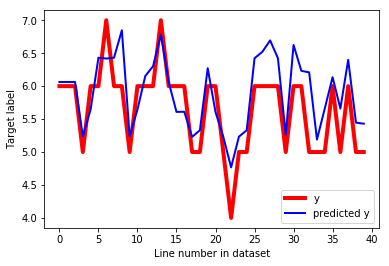

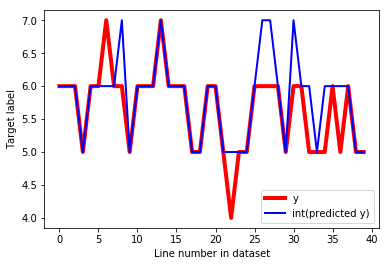

In [14]:
int_predict = []
for i in range(len(predict)):
    int_predict.append(int(round(predict[i])))
print(int_predict, end="\n\n\n")
counter = 0
for i in range(len(int_predict)):
    if testY[i] == int_predict[i]:
        counter += 1
    elif counter < 30:
        print("ОШИБКА!!!\n", "Ожидалось: ", testY[i], "Предсказание: ", int_predict[i])
print("\n\n\n", "Ошибок:", counter, "из", len(predict), sep=" ")
print("Точно предсказано:", counter / len(int_predict) * 100, "%", sep=" ")

f = 0
t = 40
xx = [i for i in range(trainX.shape[0])]
y = testY
y2 = predict

plt.figure()
plt.plot(xx[f:t], y[f:t], color='r', linewidth=4, label='y')
plt.plot(xx[f:t], y2[f:t], color='b', linewidth=2, label='predicted y')
plt.ylabel('Target label')
plt.xlabel('Line number in dataset')
plt.legend(loc=4)
plt.show()

y2 = int_predict

plt.figure()
plt.plot(xx[f:t], y[f:t], color='r', linewidth=4, label='y')
plt.plot(xx[f:t], y2[f:t], color='b', linewidth=2, label='int(predicted y)')
plt.ylabel('Target label')
plt.xlabel('Line number in dataset')
plt.legend(loc=4)
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier()
% time
knnModel.fit(trainX, trainY)



Wall time: 0 ns


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
accuracy = knnModel.score(testX, testY)
print("Accuracy:", "%.6f" % accuracy, sep=" ")
